In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from a345_utilities import print_header, mem_usage     
from matplotlib.patches import Rectangle as rect 
import numpy as np
import os, time
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture
from a345_utilities import print_header 
from photutils import DAOStarFinder
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
from astropy.coordinates import SkyCoord
from photutils import CircularAnnulus
from scipy.optimize import curve_fit
from astropy.modeling import models, fitting
from astropy.time import Time
import re
import warnings
warnings.filterwarnings('ignore')
from astropy.stats import sigma_clipped_stats
import pandas as pd
from astroquery.astrometry_net import AstrometryNet
from astroquery.exceptions import TimeoutError
plt.style.use('report.mplstyle')

/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_81172/2508782109.py:10: DeprecationWarning: `photutils.DAOStarFinder` is a deprecated alias for `photutils.detection.DAOStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import DAOStarFinder` to silence this warning.
  from photutils import DAOStarFinder
/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_81172/2508782109.py:12: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import aperture_photometry, CircularAperture
/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_81172/2508782109.py:12: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please

cal_star_10_R_airmass.csv
cal_star_29_R_airmass.csv
cal_star_14_R_airmass.csv
cal_star_8_R_airmass.csv


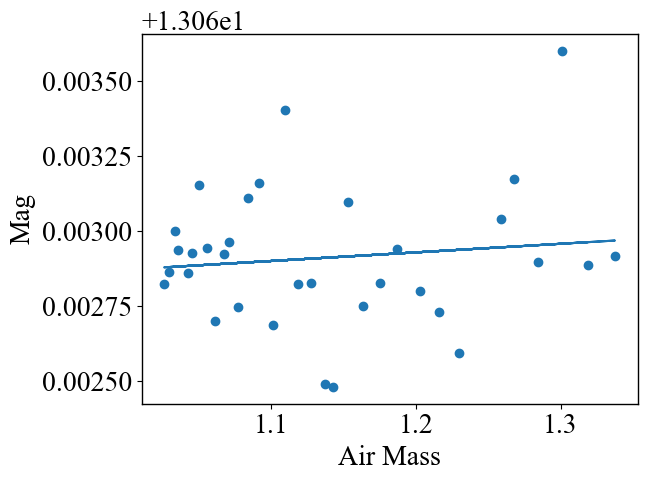

file cal_star_8_R_airmass.csv
params [2.86982731e-04 1.30625851e+01]
cal_star_13_R_airmass.csv
cal_star_17_R_airmass.csv
file cal_star_17_R_airmass.csv
params [ 0.2212304  14.16528171]
cal_star_24_R_airmass.csv
cal_star_19_R_airmass.csv
cal_star_20_R_airmass.csv
cal_star_5_R_airmass.csv
file cal_star_5_R_airmass.csv
params [ 0.06474844 12.335819  ]
cal_star_1_R_airmass.csv
file cal_star_1_R_airmass.csv
params [ 0.14328241 10.23378788]
cal_star_6_R_airmass.csv
cal_star_2_R_airmass.csv
file cal_star_2_R_airmass.csv
params [ 0.14349544 10.23345606]
cal_star_30_R_airmass.csv
cal_star_27_R_airmass.csv
cal_star_23_R_airmass.csv
file cal_star_23_R_airmass.csv
params [ 0.10694446 14.73074372]
cal_star_3_R_airmass.csv
file cal_star_3_R_airmass.csv
params [ 0.14316053 10.23375692]
cal_star_7_R_airmass.csv
cal_star_22_R_airmass.csv
cal_star_26_R_airmass.csv
cal_star_21_R_airmass.csv
file cal_star_21_R_airmass.csv
params [ 0.01685498 14.7358427 ]
cal_star_18_R_airmass.csv
cal_star_25_R_airmass.csv

In [28]:
ext_coef = []
def linear(x,m,c):
    return m*x+c
counter = 0
for i in np.arange(len(os.listdir('airmass/NSVS7293918/R'))):
    list = os.listdir('airmass/NSVS7293918/R')
    df = pd.read_csv('airmass/NSVS7293918/R/'+list[i])
    average = np.mean(df['Mag'])
    print(list[i])
    for j in np.arange(len(df['Mag'])):
        check_mag = df['Mag'][j]-average
        if abs(check_mag) > 0.1:
            df = df.drop(j)
        
    if len(df['Mag']) < 3:
        continue

    popt, pcov = curve_fit(linear, df['Air Mass'], df['Mag'])
    if popt[0] < 0:
        continue
    if counter == 0:
        plt.scatter(df['Air Mass'], df['Mag'])
        plt.xlabel('Air Mass')
        plt.ylabel('Mag')
        plt.plot(df['Air Mass'], linear(df['Air Mass'], *popt))
        
        plt.show()
        counter += 1
    ext_coef.append(popt[0])
    print('file',list[i])
    print('params',popt)

In [29]:
print('extinction coefficient',np.mean(ext_coef), '±' , np.mean(ext_coef)/1.8*np.mean(np.sqrt(np.diag(pcov))))

extinction coefficient 0.10500045564874769 ± 0.0011447122144363456


NSVS7293918_LIGHT_2024-02-01T21-47-39Z_Chr-G_120s_-10.0C_W_0027.fits_c.fits
29 13 08.67 07 44 41.636
 id xcentroid ycentroid sharpness  ... sky    peak      flux        mag      
--- --------- --------- ---------- ... --- --------- --------- --------------
325 1.5807169 997.41991 0.22997591 ...   0 32800.518 1118.2123     -7.6213107
  1 1.5802478 1.5801763 0.23013439 ...   0 32803.014 1118.2042     -7.6213028
  2 997.41934 1.5804933  0.2299919 ...   0  32794.88 1117.8862      -7.620994
326 997.41978 997.41907  0.2299351 ...   0 32792.215 1117.8308     -7.6209401
154 509.14466  475.4488  0.4465342 ...   0  51033.52 562.47966     -6.8752671
 98 245.49333  298.4435 0.43533388 ...   0 45138.569 379.16751     -6.4470778
201 352.48497 595.30556 0.45910272 ...   0 43553.669 325.59006     -6.2816778
222 543.77376 668.86602 0.43370598 ...   0 39889.534 226.35935     -5.8869961
230 871.55799 680.69145 0.46130748 ...   0 38131.637 162.89996     -5.5298024
226 467.78741 674.84284  0.4430698 ...   

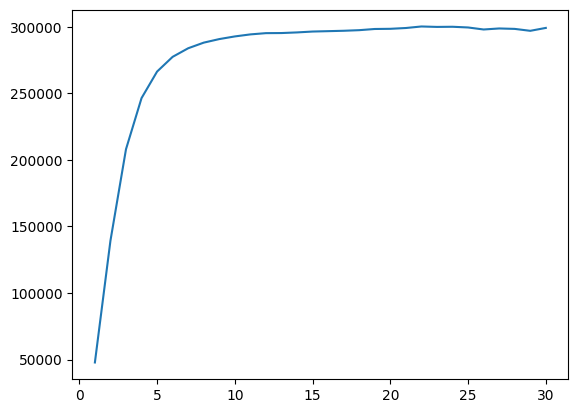

NSVS7293918_LIGHT_2024-02-01T21-01-57Z_Chr-G_120s_-10.0C_W_0017.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T19-50-02Z_Chr-G_120s_-9.9C_W_0001.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T22-15-51Z_Chr-G_120s_-10.0C_W_0033.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T21-38-54Z_Chr-G_120s_-10.0C_W_0025.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T19-58-46Z_Chr-G_120s_-10.0C_W_0003.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T21-25-47Z_Chr-G_120s_-9.9C_W_0022.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T21-15-04Z_Chr-G_120s_-10.0C_W_0020.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T22-20-14Z_Chr-G_120s_-10.0C_W_0034.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T20-29-21Z_Chr-G_120s_-10.0C_W_0010.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T20-11-53Z_Chr-G_120s_-10.0C_W_0006.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T21-56-22Z_Chr-G_120s_-10.0C_W_0029.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T22-07-07Z_Chr-G_120s_-10.0C_W_0031.fits_c.fits
NSVS7293918_LIGHT_2024-02-01T20-16-15Z_Chr-G_120s_-10.0C_W_0007.fits_c.fits
NSVS7293918_LI

([2460342.4080902776,
  2460342.376354167,
  2460342.326412037,
  2460342.4276736113,
  2460342.402013889,
  2460342.332476852,
  2460342.392905093,
  2460342.385462963,
  2460342.4307175926,
  2460342.3537152777,
  2460342.3415856482,
  2460342.4141435185,
  2460342.4216087963,
  2460342.3446180555,
  2460342.4171875,
  2460342.373310185,
  2460342.433761574,
  2460342.364212963,
  2460342.4111226853,
  2460342.379386574,
  2460342.3581365743,
  2460342.3355208333,
  2460342.3989814813,
  2460342.3824189813,
  2460342.3611805555,
  2460342.395949074,
  2460342.3294444443,
  2460342.3385416665,
  2460342.3476504628,
  2460342.389884259,
  2460342.370277778,
  2460342.4050578703,
  2460342.3506828705,
  2460342.3672453705,
  2460342.4246412036],
 [12.203317346257641,
  12.267607597821238,
  12.047956457626842,
  11.865473242776698,
  12.319660637547662,
  11.855780643247279,
  12.35927262916783,
  12.334056811880808,
  11.89139895889974,
  12.02990010128374,
  11.870096629874563,
  12.0

In [4]:
from photometry import photometry
photometry('NSVS7293918','Chr G', 9, 4,False)

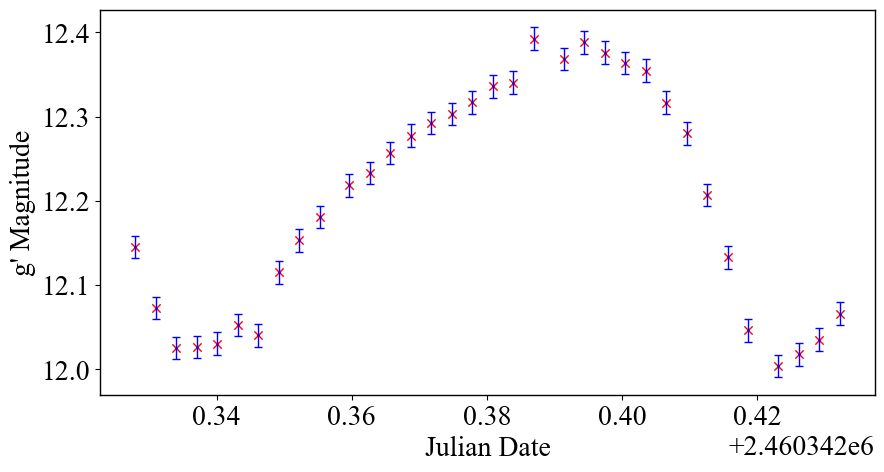

In [19]:

df = pd.read_csv('airmass/NSVS7293918/R/cal_star_4_R_airmass.csv')
data= np.loadtxt('data/NSVS7293918_R.txt',skiprows = 1, delimiter = ',')
Julian = data[:,0]
MAg = data[:,1]
plt.figure(figsize =(10,5))
plt.xlabel('Julian Date')
plt.ylabel('g\' Magnitude')
plt.errorbar(df['JD'], df['Mag'], yerr = df['error'], color = 'b',fmt='o',markersize = 0.5, capsize=3,linewidth = 1)
plt.scatter(df['JD'], df['Mag'], color = 'r',marker = 'x' ,linewidth = 1)
plt.savefig('graphs/lightcurve_r.pdf', format = 'pdf',bbox_inches='tight',pad_inches=0.3)
plt.show()


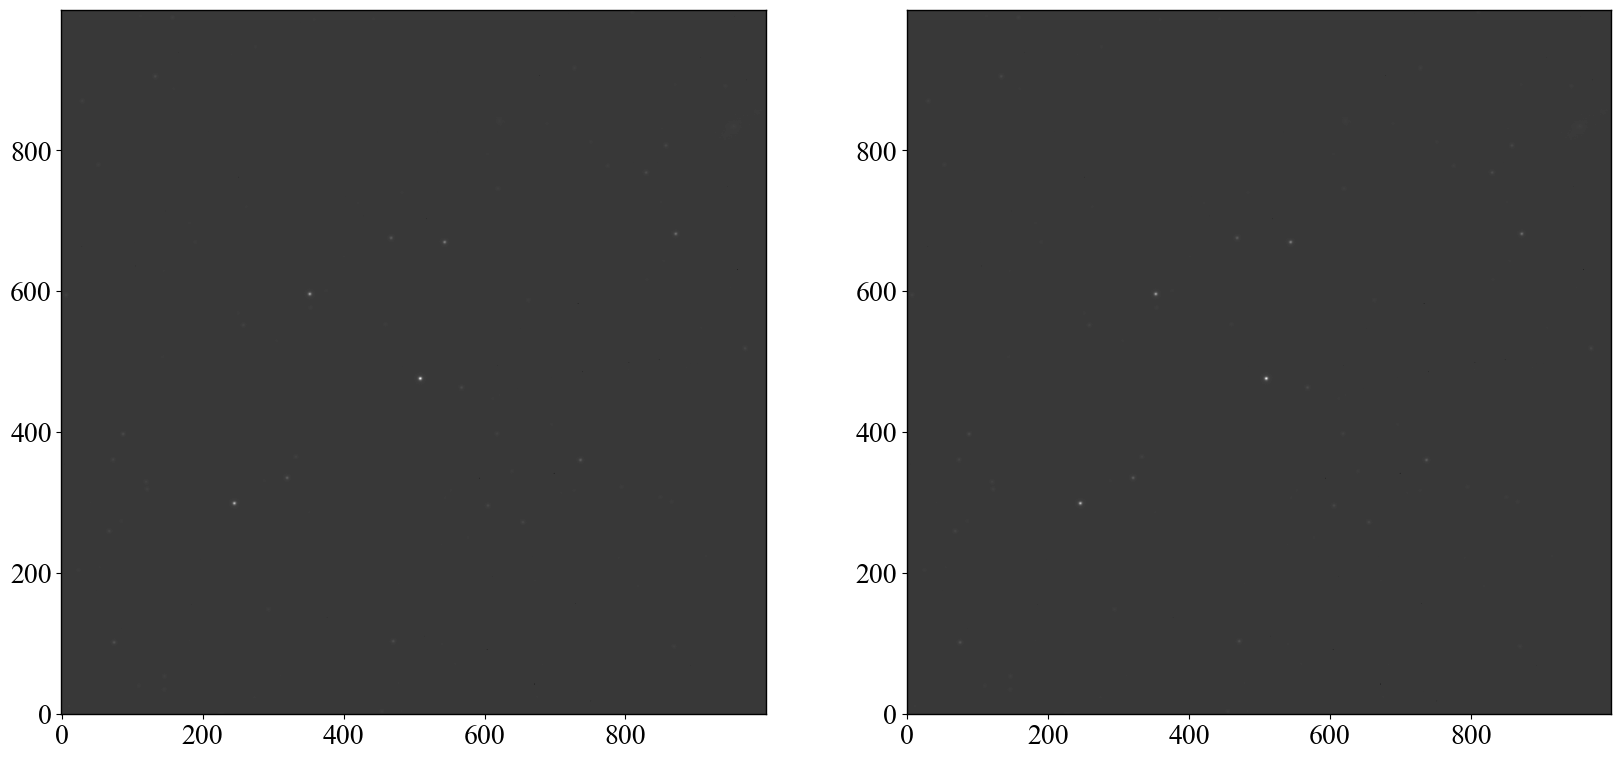

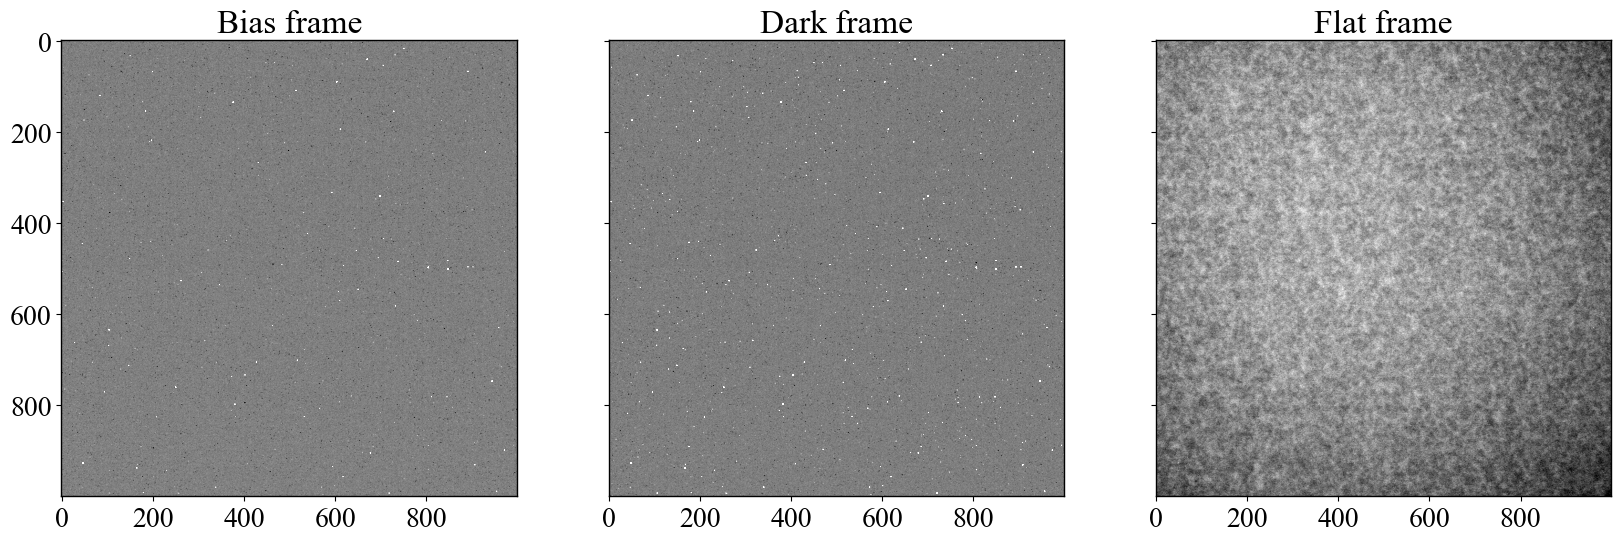

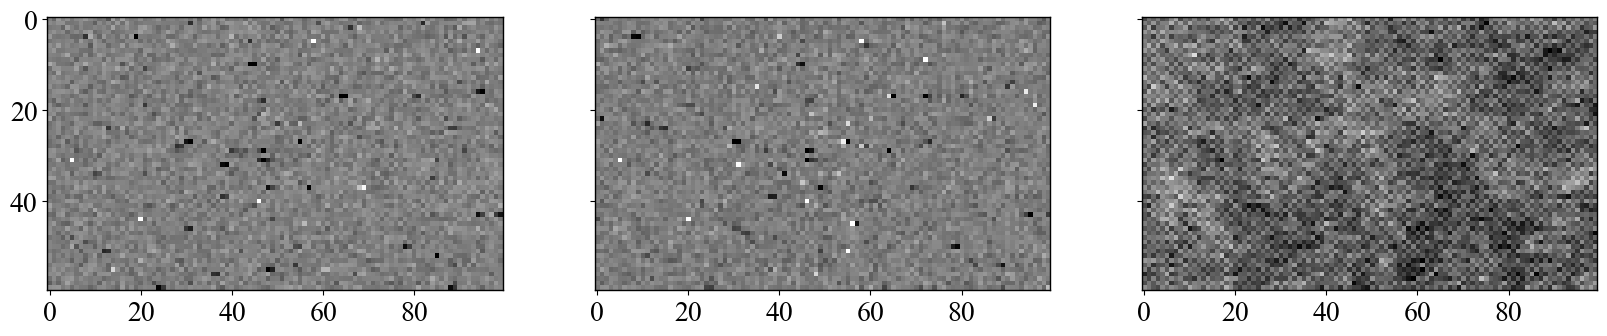

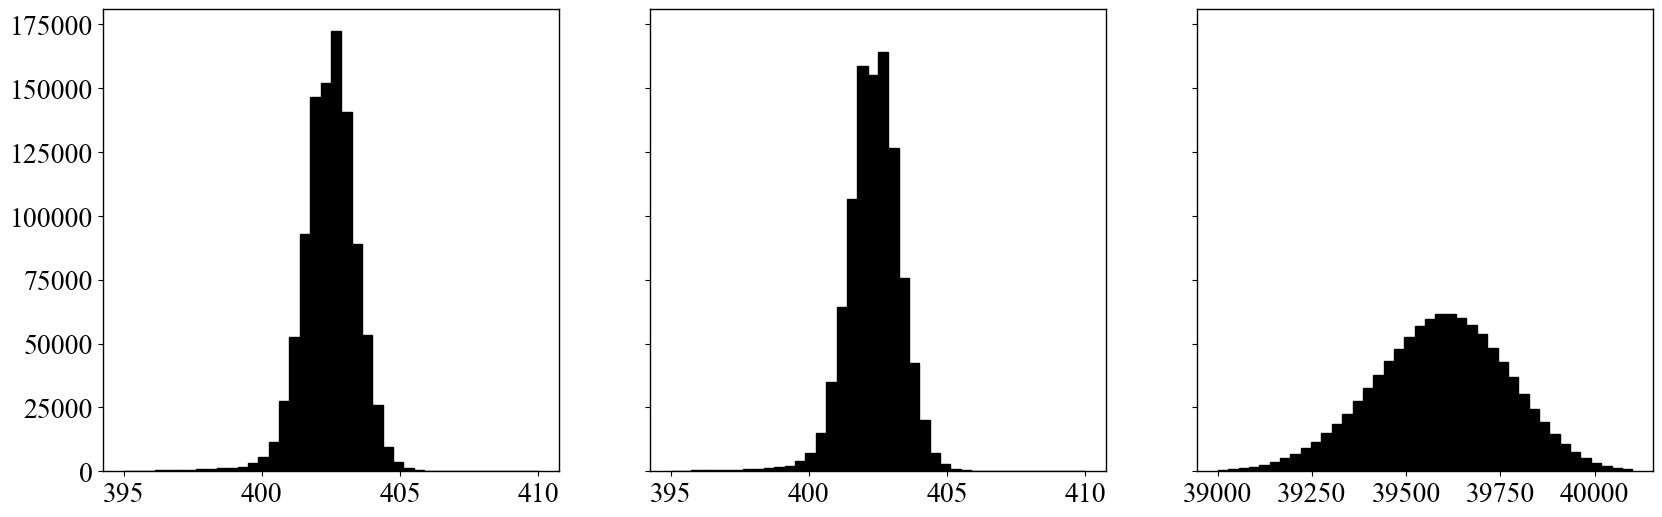

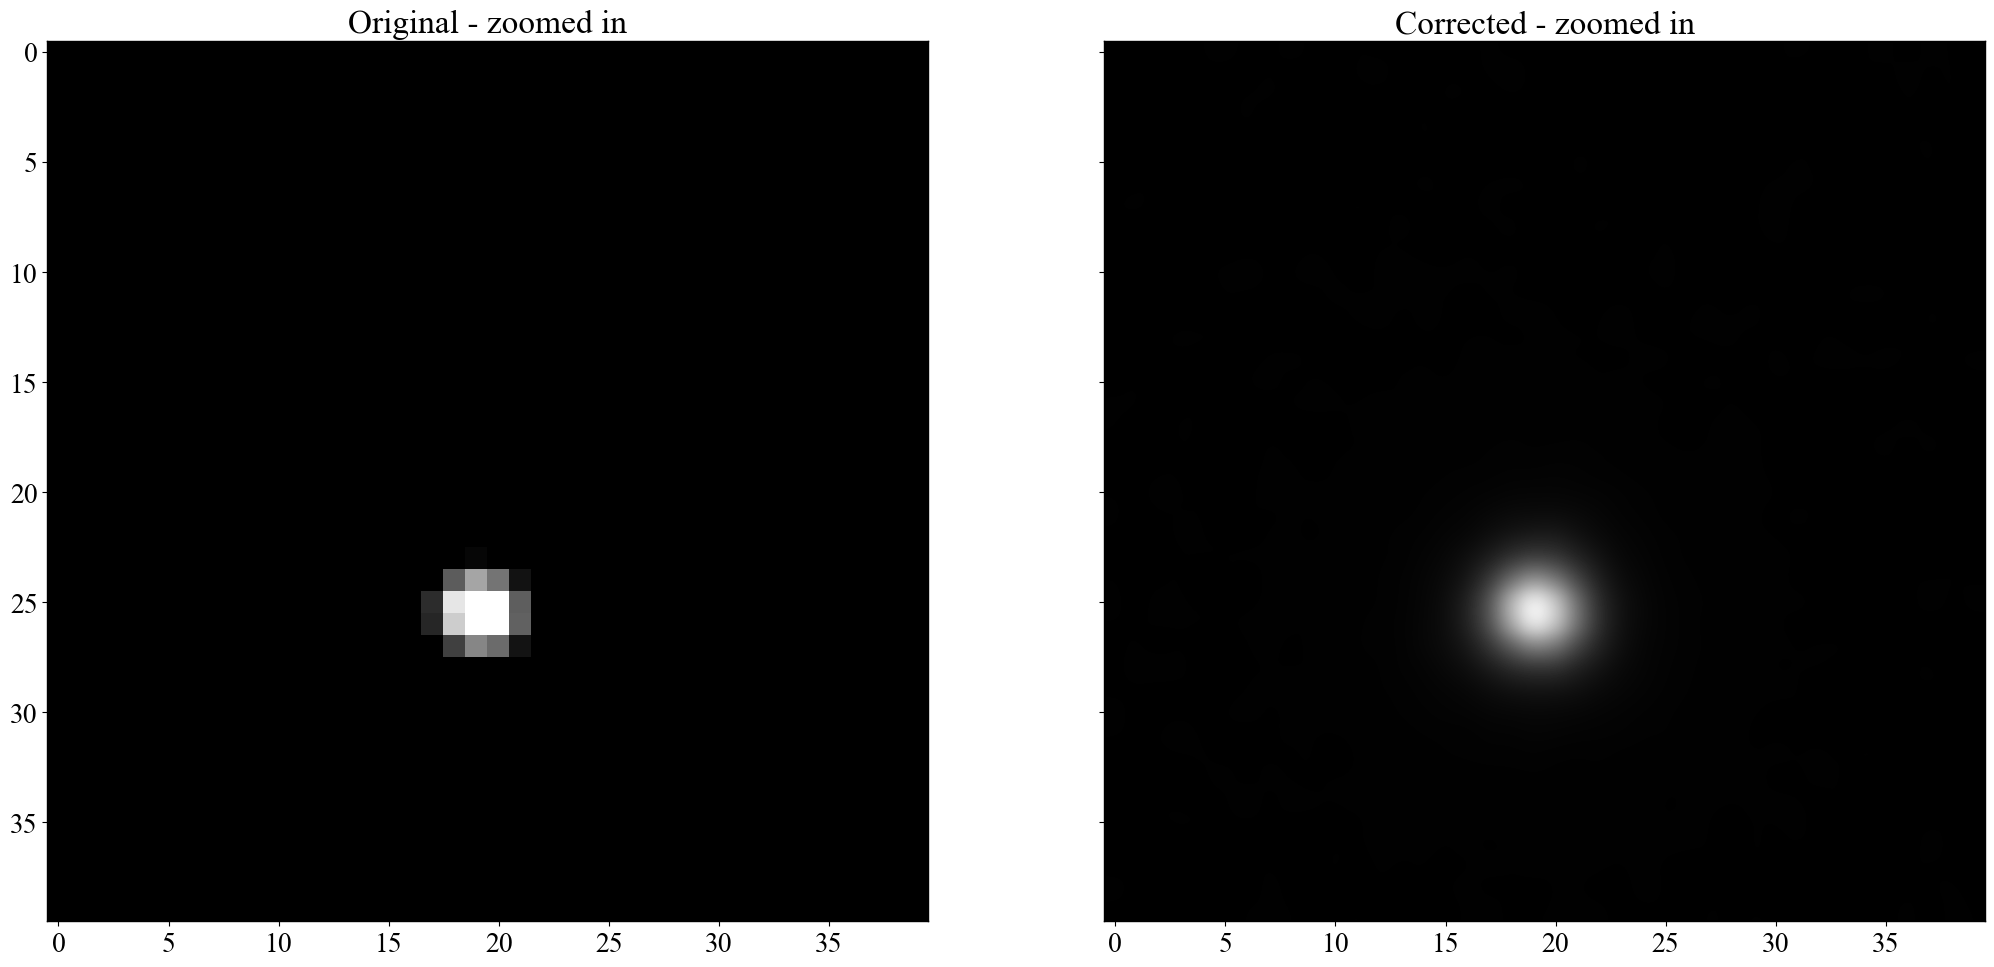

In [20]:
file = 'SX-UMa_LIGHT_2024-04-09T19-57-42Z_Chr-G_60s_-10.0C_W_0001.fits_c.fits'
data_path = '/Volumes/external_2T/corrected/wcs/NSVS7293918/Chr G/'
cal_path = '/Volumes/external_2T/calibration/2023-10/neg10c/master/'
list = os.listdir(data_path)
with fits.open(cal_path + 'flat_i_master.fits') as hdu:
    flat_i = hdu[0].data
with fits.open(cal_path + 'flat_g_master.fits') as hdu:
    flat_g = hdu[0].data
with fits.open(cal_path + 'flat_r_master.fits') as hdu:
    flat_r = hdu[0].data
with fits.open(cal_path + 'dark_flat_gr_3s_master.fits') as hdu:
    flat_dark = hdu[0].data
    
    avg_flat_dark = np.mean(flat_g-flat_dark)
with fits.open(cal_path + 'dark_' + '10s' + '_master.fits') as hdu:
    dark = hdu[0].data

with fits.open(data_path + list[0]) as hdu:
    data = hdu[0].data
    header = hdu[0].header




plt.figure(figsize=(20,10))
plt.subplot(1,2, 1)
plt.imshow(data, cmap='gray', origin='lower')
plt.subplot(1,2,2)
plt.imshow(data, cmap='gray', origin='lower')
plt.show()

bias_min = 395; bias_max = 410
dark_min = 395; dark_max = 410
flat_min = 39000; flat_max = 40100
nbins = 40

f1, (ax_bias, ax_dark, ax_flat) = plt.subplots(1, 3, sharey=True, figsize=(20,8))
plot_bias = ax_bias.imshow(flat_dark, vmin = bias_min, vmax=bias_max, cmap='gray')
plot_dark = ax_dark.imshow(dark, vmin = dark_min, vmax=dark_max, cmap='gray')
plot_flat = ax_flat.imshow(flat_g, vmin = flat_min, vmax=flat_max, cmap='gray')
ax_bias.set_title('Bias frame')
ax_dark.set_title('Dark frame')
ax_flat.set_title('Flat frame')

p=[800,800]                   
w=100; h=60

f2, (ax_bias_sub, ax_dark_sub, ax_flat_sub) = plt.subplots(1, 3, sharey=True, figsize=(20,8))
#f2, (ax_bias_sub, ax_dark_sub, ax_flat_sub) = plt.subplots(1, 3, sharey=True)

ax_bias_sub.imshow(flat_dark[p[1]:p[1]+h,p[0]:p[0]+w], vmin = bias_min, vmax=bias_max, cmap='gray', interpolation="none")
ax_dark_sub.imshow(dark[p[1]:p[1]+h,p[0]:p[0]+w], vmin = dark_min, vmax=dark_max, cmap='gray', interpolation="none")
ax_flat_sub.imshow(flat_g[p[1]:p[1]+h,p[0]:p[0]+w], vmin = flat_min, vmax=flat_max, cmap='gray', interpolation="none")


f3, (ax_bias_hist, ax_dark_hist, ax_flat_hist) = plt.subplots(1, 3, sharey=True, figsize=(20,6))
#f3, (ax_bias_hist, ax_dark_hist, ax_flat_hist) = plt.subplots(1, 3, sharey=True)

ax_bias_hist.hist(flat_dark.flatten(), bins=nbins, range=(bias_min, bias_max), fc='k', ec='k');
ax_dark_hist.hist(dark.flatten(), bins=nbins, range=(dark_min, dark_max), fc='k', ec='k');
ax_flat_hist.hist(flat_g.flatten(), bins=40, range=(flat_min, flat_max), fc='k', ec='k');


a=450
b=490
c=490
d=530
image_data_corrected_sub = data[a:b, c:d]
image_data_sub = data[a:b,c:d]

cmin_raw = 37000; cmax_raw = 47000

cmin_corrected = 0; cmax_corrected = 470000


fig1, (ax_raw, ax_corrected) = plt.subplots(1,2, sharey=True, figsize=(25,20))

ax_raw.set_title('Original - zoomed in')
ax_corrected.set_title('Corrected - zoomed in')
ax_raw.imshow(image_data_sub,  vmin = cmin_raw, vmax=cmax_raw, cmap='gray', interpolation='none')#, vmin = cmin_corrected, vmax=cmax_corrected
ax_corrected.imshow(image_data_corrected_sub, cmap='gray',interpolation='quadric')#, vmin = cmin_corrected, vmax=cmax_corrected

    

In [ ]:
df = pd.read_csv('airmass/NSVS7293918/R/cal_star_4_R_airmass.csv')

df['Mag']